# 聚类

In [17]:
# beer dataset
import pandas as pd
beer = pd.read_csv('data.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [18]:
X = beer[["calories","sodium","alcohol","cost"]]
print(X)

    calories  sodium  alcohol  cost
0        144      15      4.7  0.43
1        151      19      4.9  0.43
2        157      15      0.9  0.48
3        170       7      5.2  0.73
4        152      11      5.0  0.77
5        145      23      4.6  0.28
6        175      24      5.5  0.40
7        149      27      4.7  0.42
8         99      10      4.3  0.43
9        113       8      3.7  0.40
10       140      18      4.6  0.44
11       102      15      4.1  0.46
12       135      11      4.2  0.50
13       150      19      4.7  0.76
14       149       6      5.0  0.79
15        68      15      2.3  0.38
16       139      19      4.4  0.43
17       144      24      4.9  0.43
18        72       6      2.9  0.46
19        97       7      4.2  0.47


## K-means clustering
我们创建两个kmeans模型,聚类簇数分别设置为3和2。

In [19]:
from sklearn.cluster import KMeans

km3 = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)

.labels_属性可以表示所有数据所属的簇:

In [20]:
km3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2], dtype=int32)

In [21]:
beer['cluster3'] = km3.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster3')

,name,calories,sodium,alcohol,cost,cluster3,cluster2
18,Olympia_Goled_Light,72,6,2.9,0.46,0,1
15,Pabst_Extra_Light,68,15,2.3,0.38,0,1
0,Budweiser,144,15,4.7,0.43,1,0
1,Schlitz,151,19,4.9,0.43,1,0
2,Lowenbrau,157,15,0.9,0.48,1,0
3,Kronenbourg,170,7,5.2,0.73,1,0
4,Heineken,152,11,5.0,0.77,1,0
5,Old_Milwaukee,145,23,4.6,0.28,1,0
6,Augsberger,175,24,5.5,0.40,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,0


In [31]:
from pandas.plotting import scatter_matrix
%matplotlib inline

cluster_centers_3 = km3.cluster_centers_

cluster_centers_2 = km2.cluster_centers_

我们还可以观察对应聚类的数据差异:

In [23]:
beer.groupby("cluster3").mean()

,calories,sodium,alcohol,cost,cluster2
cluster3,,,,,
0,70.00,10.5,2.600000,0.420000,1
1,150.00,17.0,4.521429,0.520714,0
2,102.75,10.0,4.075000,0.440000,1


In [25]:
beer.groupby("cluster2").mean()

,calories,sodium,alcohol,cost,cluster3
cluster2,,,,,
0,150.000000,17.000000,4.521429,0.520714,1.000000
1,91.833333,10.166667,3.583333,0.433333,1.333333


## 画图
接下来我们把聚类后的数据画出来,同时画出每个类的特征均值(下面只画两个特征Calories和Alcohol):

In [26]:
centers = beer.groupby("cluster3").mean().reset_index()

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [28]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0, 0.5, 'Alcohol')

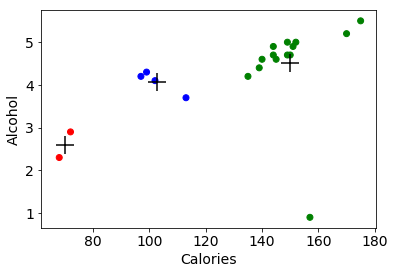

In [29]:
plt.scatter(beer["calories"], beer["alcohol"],c=colors[beer["cluster3"]])

plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

plt.xlabel("Calories")
plt.ylabel("Alcohol")

从图中可以发现有三类数据,最左边只有两个样本,中间有四个样本,最右边的类样本最多。

Text(0.5, 0.98, 'With 3 centroids initialized')

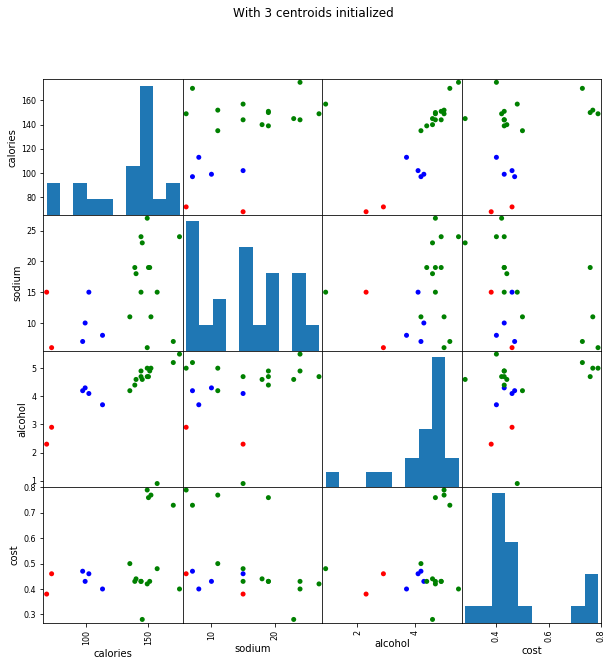

In [33]:
# 这里我们只看到两类特征,我们想看所有的两两特征,就可以画个简单的散点图:X轴有四个属性,Y轴有四个属性,对角线是数据的分布。
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster3"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized")

Text(0.5, 0.98, 'With 2 centroids initialized')

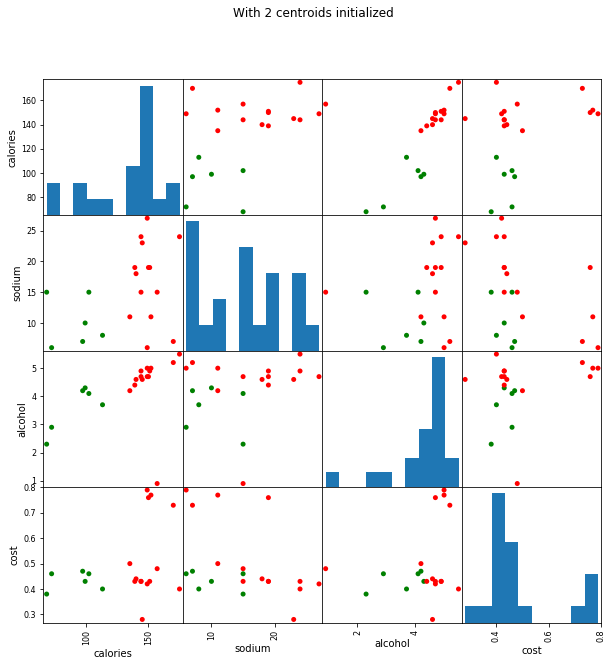

In [35]:
# X轴有四个属性,Y轴有四个属性,对角线是数据的分布。
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized")

### Scaled data 标准化/归一化
接下来我们对数据进行标准化或者归一化(消除数据之间的差异性,聚类之前基本上都要这么做):

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

/home/kuo/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kuo/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [37]:
km3 = KMeans(n_clusters=3).fit(X_scaled)

In [38]:
beer["scaled_cluster"] = km3.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster3,cluster2,scaled_cluster
9,Budweiser_Light,113,8,3.7,0.40,2,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0,1,0
12,Michelob_Light,135,11,4.2,0.50,1,0,0
11,Coors_Light,102,15,4.1,0.46,2,1,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0,1,0
8,Miller_Lite,99,10,4.3,0.43,2,1,0
19,Schlitz_Light,97,7,4.2,0.47,2,1,0
2,Lowenbrau,157,15,0.9,0.48,1,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,0,1
5,Old_Milwaukee,145,23,4.6,0.28,1,0,1


What are the "characteristics" of each cluster?

In [39]:
beer.groupby("scaled_cluster").mean()

,calories,sodium,alcohol,cost,cluster3,cluster2
scaled_cluster,,,,,,
0,105.375,10.875,3.3250,0.4475,1.25,0.75
1,148.375,21.125,4.7875,0.4075,1.00,0.00
2,155.250,10.750,4.9750,0.7625,1.00,0.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2239596b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f22393735f8>]], dtype=object)

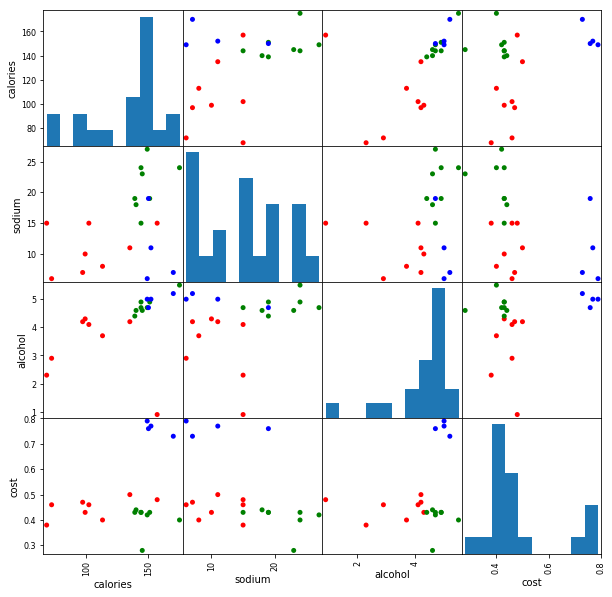

In [41]:
scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100)

在处理标准化之前,我们发现calories比较重要(值比较大),cost不太重要。处理之后,就是同样重要。

## 聚类评估：轮廓系数（Silhouette Coefficient ）

<img src="1.png" alt="FAO" width="490">

- 计算样本i到同簇其他样本的平均距离ai。ai 越小，说明样本i越应该被聚类到该簇。将ai 称为样本i的簇内不相似度。
- 计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}


* si接近1，则说明样本i聚类合理
* si接近-1，则说明样本i更应该分类到另外的簇
* 若si 近似为0，则说明样本i在两个簇的边界上。

我们对标准化前后的数据进行轮廓系数计算:

In [43]:
from sklearn import metrics
score_scaled = metrics.silhouette_score(X,beer.scaled_cluster)
score = metrics.silhouette_score(X,beer.cluster3)
print(score_scaled, score)

0.179780680894 0.673177504646


我们发现,做标准化的结果比较低,不做标准化的结果比较高。这是因为特征的重要性我们是不知道的,我们将
calories的重要度通过标准化降低之后可能会造成不好的影响。

In [44]:
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.69176560340794857,
 0.67317750464557957,
 0.58570407211277953,
 0.42254873351720218,
 0.45591821670133781,
 0.43776116697963136,
 0.38946337473126003,
 0.39746405172426014,
 0.40815990138996028,
 0.32472080133848924,
 0.34597752371272478,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.28495140011748982,
 0.23498077333071996,
 0.15880910174962809,
 0.084230513801511767]

Text(0, 0.5, 'Sihouette Score')

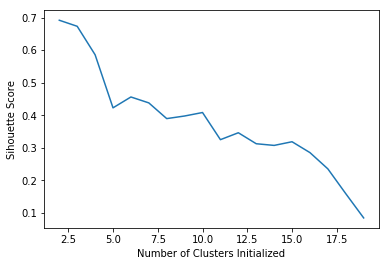

In [45]:
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")

到这里呢,我们就有了kmeans的一个标准流程:我们先进行聚类,然后可视化展示,之后再评估,想一想什么参数
比较合适,再重新聚类。